In [1]:
import pandas as pd
df = pd.read_csv("./NewYork_36059_Module6NN1stRun.csv", low_memory=False)
df2 = df.loc[df["Tract Code"] == 411302]
df3 = df2.loc[df2["Block Code"] == 5002]

In [98]:
# print(df3[["Tract Code", "Block Code", "HH ID", "Person ID Number"]])
print df.shape
print df2.shape
print df3.shape

(1339532, 70)
(6838, 70)
(163, 70)


([1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 4, 4, 4, 5, 5, 5, 5, 5, 5, 5, 5, 6, 6, 7, 7, 4, 2, 17], [102977.93154317552, 37620.021662737054, 113913.33284470995, 146436.30029073788, 886190.9459044455, 131803.21369307055, 613081.7843567774, 126279.62052606448, 160926.4674810181, 217200.79091437938, 179781.29896579025, 52375.18270603608, 80878.83785213527, 65671.01605054294, 376083.056076476, 549329.475462756, 71322.03296432126, 98923.85770078233, 425462.2843377354, 612871.6724477911, 83448.41590277437, 180584.34683777555, 355331.25263573683, 82773.87959460563, 127499.28448225034, 917288.2166421902, 91375.31817249852, 691544.873081338, 311332.33846172824, 249956.3327312288, 152018.20409660134, 101767.78554222347, 58800.56714406827, 183083.99189453397, 40223.681372941515, 381174.78362565336, 504596.462897585, 534500.3243701567, 86945.36275065594, 80344.89819313558, 131363.26182161534, 97258.28709570541, 86690.22590618323])


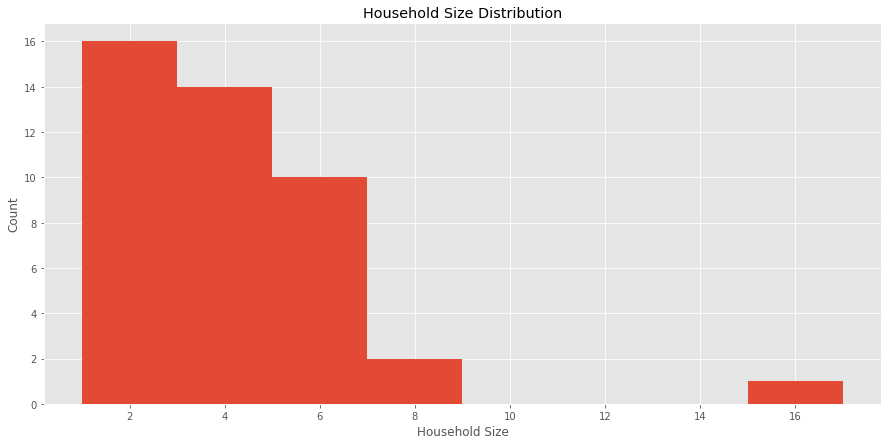

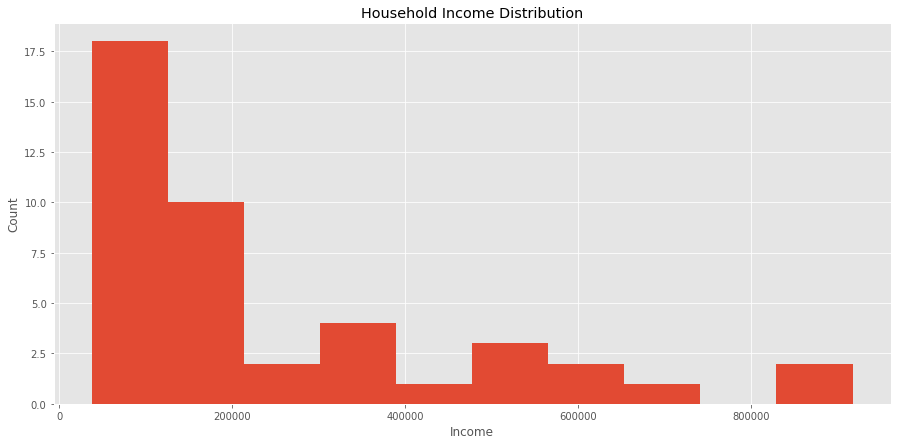

People per house array [1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 4, 4, 4, 5, 5, 5, 5, 5, 5, 5, 5, 6, 6, 7, 7, 4, 2, 17]
Number of individuals in my census block: 163 
Number of households in my census block: 43


In [152]:
import numpy as np
house_sizes = []
house_income = []

for i in range(len(np.unique(person_df3["HH ID"]))):
    house_sizes.append(len(person_df3.loc[person_df3["HH ID"] == np.unique(person_df3["HH ID"])[i]]))
    house_income.append(sum(person_df3.loc[person_df3["HH ID"] == np.unique(person_df3["HH ID"])[i]]["Income Amount"]))
print(house_sizes, house_income)

import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(15,7))
plt.hist(house_sizes, bins=(len(np.unique(house_sizes))))
plt.xlabel('Household Size')
plt.ylabel('Count')
plt.title("Household Size Distribution")
plt.show()


import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(15,7))
plt.hist(house_income, bins=10)
plt.xlabel('Income')
plt.ylabel('Count')
plt.title("Household Income Distribution")
plt.show()

print "People per house array", house_sizes
print "Number of individuals in my census block:", df3.shape[0], "\nNumber of households in my census block:", len(np.unique(person_df3["HH ID"])) 

In [3]:
person_df = pd.read_csv("./NewYork36059Module1NN2ndRun.csv", low_memory=False)
person_df2 = person_df.loc[person_df["Tract Code"] == 411302]
person_df3 = person_df2.loc[person_df2["Block Code"] == 5002]
print(person_df3)

        Unnamed: 0  Residence State  County Code  Tract Code  Block Code  \
665287     8404337               36           59      411302        5002   
665288     8404338               36           59      411302        5002   
665289     8404339               36           59      411302        5002   
665290     8404340               36           59      411302        5002   
665291     8404341               36           59      411302        5002   
665292     8404342               36           59      411302        5002   
665293     8404343               36           59      411302        5002   
665294     8404344               36           59      411302        5002   
665295     8404345               36           59      411302        5002   
665296     8404346               36           59      411302        5002   
665297     8404347               36           59      411302        5002   
665298     8404348               36           59      411302        5002   
665299     8

In [4]:
print(person_df3[["HH ID", "HH TYPE", "Person ID Number", "Age", "Sex", "Income Amount"]].to_string())

          HH ID  HH TYPE  Person ID Number  Age  Sex  Income Amount
665287  3164560        1       36008404338   63    1  102977.931543
665288  3164561        1       36008404339   65    0   37620.021663
665289  3164562        1       36008404340   54    1  113913.332845
665290  3164563        0       36008404341   84    1       0.000000
665291  3164563        0       36008404342   58    0  146436.300291
665292  3164564        0       36008404343   82    1       0.000000
665293  3164564        0       36008404344   56    0  886190.945904
665294  3164565        0       36008404345   81    1       0.000000
665295  3164565        0       36008404346   58    0  131803.213693
665296  3164566        0       36008404347   82    1       0.000000
665297  3164566        0       36008404348   55    0  613081.784357
665298  3164567        0       36008404349   92    0       0.000000
665299  3164567        0       36008404350   42    1  126279.620526
665300  3164568        0       36008404351   69 

In [106]:
print "Total Househole Income:", person_df["Income Amount"].sum()

Total Househole Income: 67929238094.9


In [5]:
# How many people live in your block
total_pop = person_df3.shape[0]
print "Total Population:", total_pop

Total Population: 163


In [124]:
# Sex distribution:
male = person_df3["Sex"].sum() * 1.
perc_male = 100 * male / total_pop 
female = total_pop - male * 1.
perc_female = 100 *female / total_pop
print "Number of Males:", male, "(%", perc_male.round(1) ,")\nNumber of Females:", female, "(%", perc_female.round(1),")"

Number of Males: 85.0 (% 52.1 )
Number of Females: 78.0 (% 47.9 )


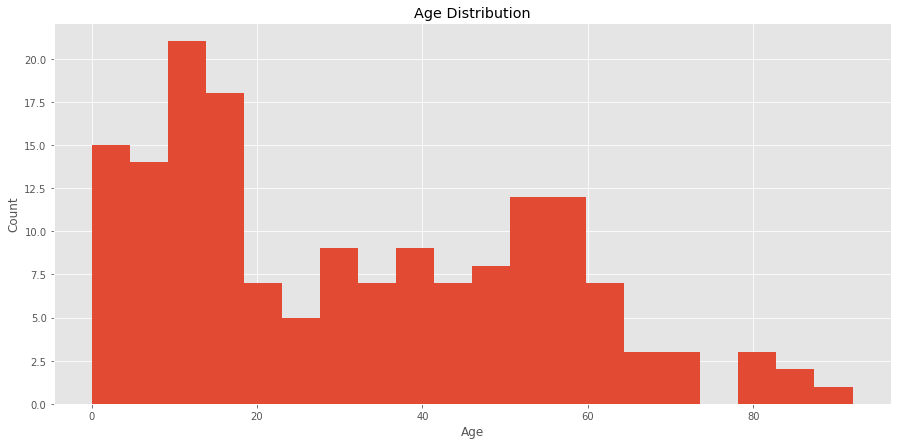

In [21]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(15,7))
plt.hist(person_df3["Age"], bins=20)
plt.xlabel('Age')
plt.ylabel('Count')
plt.title("Age Distribution")
plt.show()

In [32]:
# Find your HH ID 
print "When looking through the data, all the households with 5 people all have one parent in the age range of 40-55 and" 
print "four children. This seems abnormal because I know many households on my block (including myself) that have 2 parents" 
print "and 3 children."
print
print "With this in mind I chose a household that had children with similar ages to me, so I chose HHID # 3164590."
my_house = person_df3.loc[person_df3["HH ID"] == 3164590]
print 
print "This is \"my house\""
print(my_house[["HH ID", "HH TYPE", "Person ID Number", "Age", "Sex", "Income Amount"]].to_string())

When looking through the data, all the households with 5 people all have one parent in the age range of 40-55 and
four children. This seems abnormal because I know many households on my block (including myself) that have 2 parents
and 3 children.

With this in mind I chose a household that had children with similar ages to me, so I chose HHID # 3164590.

This is "my house"
          HH ID  HH TYPE  Person ID Number  Age  Sex  Income Amount
665371  3164590        0       36008404422   58    0  152018.204097
665372  3164590        0       36008404423   11    1       0.000000
665373  3164590        0       36008404424   12    0       0.000000
665374  3164590        0       36008404425   11    1       0.000000
665375  3164590        0       36008404426   13    1       0.000000


In [100]:
import math
def pixelate(latitude, longitude):
    xPixel = math.floor(138.348*(longitude + 97.5) * math.cos(math.radians(latitude)))
    yPixel = math.floor(138.348*(latitude-37.0))
    return xPixel, yPixel
print(pixelate(40.639091, -73.725510))

(2495.0, 503.0)


Total trips: 14
Number of trips each person in the house makes: [2, 4, 3, 3, 2]
Total Distance:  61.4 miles
Average Trip length  4.4 miles
[2495.0, 503.0, 'Home', '27747.422121118118', 2497.0, 504.0, 'WOODMERE MIDDLE SCHOOL', 1.3416407864998738]
[2497.0, 504.0, 'WOODMERE MIDDLE SCHOOL', '59215.63920920255', 2495.0, 503.0, 'Home', 1.3416407864998738]
[2495.0, 503.0, 'Home', '29598.22062944721', 2497.0, 504.0, 'WOODMERE MIDDLE SCHOOL', 1.3416407864998738]
[2497.0, 504.0, 'WOODMERE MIDDLE SCHOOL', '57353.77272886869', 2495.0, 503.0, 'Home', 1.3416407864998738]
[2495.0, 503.0, 'Home', '59843.08833769516', 2493.0, 513.0, 'MARK HENNING RACING', 6.118823416311341]
[2493.0, 513.0, 'MARK HENNING RACING', '65534.83261537716', 2495.0, 503.0, 'Home', 6.118823416311341]
[2495.0, 503.0, 'Home', '27672.28408657609', 2497.0, 504.0, 'WOODMERE MIDDLE SCHOOL', 1.3416407864998738]
[2497.0, 504.0, 'WOODMERE MIDDLE SCHOOL', '58235.84041457504', 2501.0, 512.0, 'INFOTECH PEOPLE INC', 5.366563145999495]
[2501.

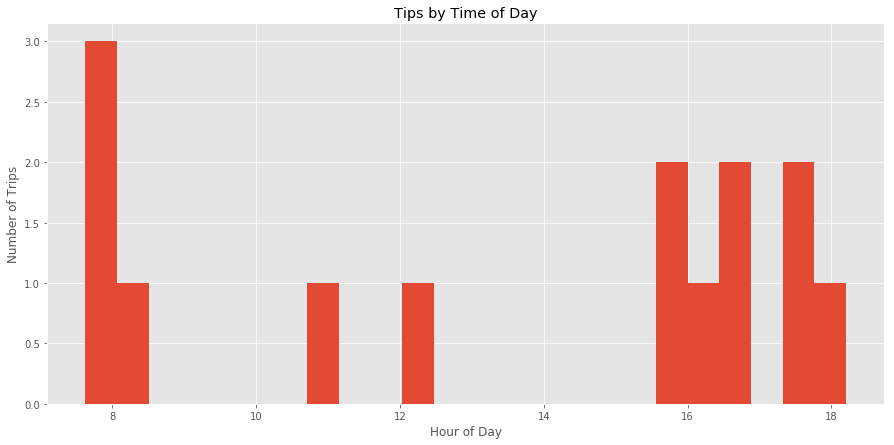

In [181]:
l = []
trip_per_person = []
for i in range(len(my_house)):
    trip_per_person.append(0)
total_distance = 0
my_house_trip = df3.loc[df3["HH ID"] == 3164590]
q = 0
for index, row in my_house_trip.iterrows():
    for j in range(1,7):
        s = "Node "+ str(j+1)+" Name"
        if not (pd.isnull(row[s])):
            trip_per_person[q] += 1
            # {oXpixel,  oYpixel,  oName,  oTime,  dXpixel,  dYpixel,  dName,  1,2xPixel2PixelCartesianDistanceInMiles}
            # get info and send to diff file(put in array)
            p = pixelate(row["Node "+ str(j)+" Lat"], row["Node "+ str(j)+" Lon"])
            p1 = pixelate(row["Node "+ str(j+1)+" Lat"], row["Node "+ str(j+1)+" Lon"])
            oXpixel = p[0]
            oYpixel = p[1]
            oName = row["Node "+ str(j)+" Name"]
            oTime = row["Node "+ str(j)+" Departure Time"]
            dXpixel = p1[0]
            dYpixel = p1[1]
            dName = row["Node "+ str(j+1)+" Name"]
            pixelDistance = 1.2*((math.sqrt((oXpixel - dXpixel)**2 + (oYpixel - dYpixel)**2))*.5)
            total_distance += pixelDistance
            l.append([oXpixel,  oYpixel,  oName,  oTime,  dXpixel,  dYpixel,  dName, pixelDistance])
    q += 1
print "Total trips:", len(l)
print "Number of trips each person in the house makes:", trip_per_person
print "Total Distance: ", round(total_distance, 1), "miles"
avg = total_distance / len(l)
print "Average Trip length ", round(avg,1), "miles"

z = (np.squeeze(l)[:,3])
b = []
for i in z:
    b.append(float(i)/(60*60))
fig, ax = plt.subplots(figsize=(15,7))
plt.hist(b, bins=24)
plt.xlabel('Hour of Day')
plt.ylabel('Number of Trips')
plt.title("Tips by Time of Day")
plt.show()



In [46]:
print(list(df3))

['Residence State', 'County Code', 'Tract Code', 'Block Code', 'HH ID', 'Person ID Number', 'Activity Pattern', 'Node 1 Type', 'Node 1 Predecessor', 'Node 1 Successor', 'Node 1 Name', 'Node 1 County', 'Node 1 Lat', 'Node 1 Lon', 'Node 1 Arrival Time', 'Node 1 Departure Time', 'Node 2 Type', 'Node 2 Predecessor', 'Node 2 Successor', 'Node 2 Name', 'Node 2 County', 'Node 2 Lat', 'Node 2 Lon', 'Node 2 Arrival Time', 'Node 2 Departure Time', 'Node 3 Type', 'Node 3 Predecessor', 'Node 3 Successor', 'Node 3 Name', 'Node 3 County', 'Node 3 Lat', 'Node 3 Lon', 'Node 3 Arrival Time', 'Node 3 Departure Time', 'Node 4 Type', 'Node 4 Predecessor', 'Node 4 Successor', 'Node 4 Name', 'Node 4 County', 'Node 4 Lat', 'Node 4 Lon', 'Node 4 Arrival Time', 'Node 4 Departure Time', 'Node 5 Type', 'Node 5 Predecessor', 'Node 5 Successor', 'Node 5 Name', 'Node 5 County', 'Node 5 Lat', 'Node 5 Lon', 'Node 5 Arrival Time', 'Node 5 Departure Time', 'Node 6 Type', 'Node 6 Predecessor', 'Node 6 Successor', 'Node 

In [184]:
# People Living in Your Pixel
# Step 1, add the pixelization of each row of the houses in the county
lis = []
for index, row in df.iterrows():
    lis.append(pixelate(row["Node 1 Lat"], row["Node 1 Lon"]))

AttributeError: 'list' object has no attribute 'head'

In [192]:
pixelDat = pd.DataFrame({'pixels':lis})
print pixelDat[0:20]
print pixelDat.shape
print df.shape
d = df.join(pixelDat)

             pixels
0   (2486.0, 528.0)
1   (2488.0, 525.0)
2   (2489.0, 526.0)
3   (2487.0, 524.0)
4   (2490.0, 525.0)
5   (2489.0, 525.0)
6   (2491.0, 523.0)
7   (2489.0, 524.0)
8   (2490.0, 522.0)
9   (2491.0, 521.0)
10  (2492.0, 522.0)
11  (2491.0, 522.0)
12  (2496.0, 521.0)
13  (2494.0, 529.0)
14  (2490.0, 533.0)
15  (2489.0, 531.0)
16  (2490.0, 532.0)
17  (2491.0, 531.0)
18  (2493.0, 529.0)
19  (2493.0, 528.0)
(1339532, 1)
(1339532, 70)


In [197]:
print d[0:20]
nd = d.loc[d["pixels"] == (2495.0, 503.0)]
print nd

    Residence State  County Code  Tract Code  Block Code    HH ID  \
0                36           59      300100        3022  2949253   
1                36           59      300300        3013  2950918   
2                36           59      300400        2002  2951726   
3                36           59      300500        1014  2953190   
4                36           59      300600        1011  2955140   
5                36           59      300600        1016  2955215   
6                36           59      300600        5004  2956260   
7                36           59      300700        1001  2957545   
8                36           59      300800        2001  2960982   
9                36           59      300800        3008  2961371   
10               36           59      300900        1004  2962296   
11               36           59      300900        2003  2962601   
12               36           59      300900        4052  2964163   
13               36           59  

In [207]:
print np.unique(nd["Tract Code"])
print nd["Block Code"]

[411301 411302]
257        4026
2537       4006
2542       5002
2547       5020
5554       2004
5556       2014
16440      2004
16441      2004
16442      2004
16443      2004
16444      2004
16445      2004
16446      2005
16447      2006
16448      2006
16449      2006
16450      2006
16460      2014
16461      2015
16531      4000
16533      4004
16534      4005
16535      4007
16536      4008
16555      4026
16556      5002
16557      5002
16558      5002
28202      2005
28219      4005
           ... 
1118656    5002
1118657    5002
1118658    5002
1118659    5002
1118660    5002
1118661    5002
1118662    5002
1118663    5002
1118664    5002
1118665    5002
1118666    5002
1118667    5002
1118668    5002
1118669    5002
1118670    5002
1118913    5020
1118914    5020
1118915    5020
1118916    5020
1118917    5020
1118918    5020
1118919    5020
1118920    5020
1118921    5020
1118922    5020
1118923    5020
1118924    5020
1118925    5020
1118926    5020
1118927    5020
Name: Bl

In [216]:
a = nd[['Tract Code', 'Block Code']].drop_duplicates()

In [263]:
print "Below are the unique Tract-Block combinations that are in my pixel of my house:"
print a
l = a.values.T.tolist()
q = []
arr411302 = []
arr411301 = []
for i in range(len(l[0])):
    q.append((l[0][i], l[1][i]))
    if (l[0][i] == 411302):
        arr411302.append(l[1][i])
    elif (l[0][i] == 411301):
        arr411301.append(l[1][i])
print q
print arr411302
print arr411301

Below are the unique Tract-Block combinations that are in my pixel of my house:
        Tract Code  Block Code
257         411302        4026
2537        411302        4006
2542        411302        5002
2547        411302        5020
5554        411301        2004
5556        411301        2014
16446       411301        2005
16447       411301        2006
16461       411301        2015
16531       411302        4000
16533       411302        4004
16534       411302        4005
16535       411302        4007
16536       411302        4008
188210      411302        4003
188397      411302        4013
[(411302, 4026), (411302, 4006), (411302, 5002), (411302, 5020), (411301, 2004), (411301, 2014), (411301, 2005), (411301, 2006), (411301, 2015), (411302, 4000), (411302, 4004), (411302, 4005), (411302, 4007), (411302, 4008), (411302, 4003), (411302, 4013)]
[4026, 4006, 5002, 5020, 4000, 4004, 4005, 4007, 4008, 4003, 4013]
[2004, 2014, 2005, 2006, 2015]


In [274]:
# Now isolate all houses that fall in these tract-blocks
isolate = df.loc[((df["Tract Code"] == 411302 & df["Block Code"].isin(arr411302)) | (df["Tract Code"] == 411301 & df["Block Code"].isin(arr411301)))]

In [275]:
print isolate[0:20]

Empty DataFrame
Columns: [Residence State, County Code, Tract Code, Block Code, HH ID, Person ID Number, Activity Pattern, Node 1 Type, Node 1 Predecessor, Node 1 Successor, Node 1 Name, Node 1 County, Node 1 Lat, Node 1 Lon, Node 1 Arrival Time, Node 1 Departure Time, Node 2 Type, Node 2 Predecessor, Node 2 Successor, Node 2 Name, Node 2 County, Node 2 Lat, Node 2 Lon, Node 2 Arrival Time, Node 2 Departure Time, Node 3 Type, Node 3 Predecessor, Node 3 Successor, Node 3 Name, Node 3 County, Node 3 Lat, Node 3 Lon, Node 3 Arrival Time, Node 3 Departure Time, Node 4 Type, Node 4 Predecessor, Node 4 Successor, Node 4 Name, Node 4 County, Node 4 Lat, Node 4 Lon, Node 4 Arrival Time, Node 4 Departure Time, Node 5 Type, Node 5 Predecessor, Node 5 Successor, Node 5 Name, Node 5 County, Node 5 Lat, Node 5 Lon, Node 5 Arrival Time, Node 5 Departure Time, Node 6 Type, Node 6 Predecessor, Node 6 Successor, Node 6 Name, Node 6 County, Node 6 Lat, Node 6 Lon, Node 6 Arrival Time, Node 6 Departure T